## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


## Loading Dataset

In [2]:
df = pd.read_csv("cell.csv")
df.head()  # Display first few rows


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Preprocessing


In [3]:
print(df.info())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Feature Selection

In [4]:
# Step 1: Separate Features and Target
X = df.drop('price_range', axis=1)
y = df['price_range']

In [5]:
# Step 2: Remove Low-Variance Features
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)
selected_features = X.columns[var_thresh.get_support()]

In [6]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [7]:
# Step 3: Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X[selected_features], y)
importances = rf.feature_importances_

In [8]:
# Create a Series for better visualization
feature_importance = pd.Series(importances, index=selected_features)
feature_importance_sorted = feature_importance.sort_values(ascending=False)

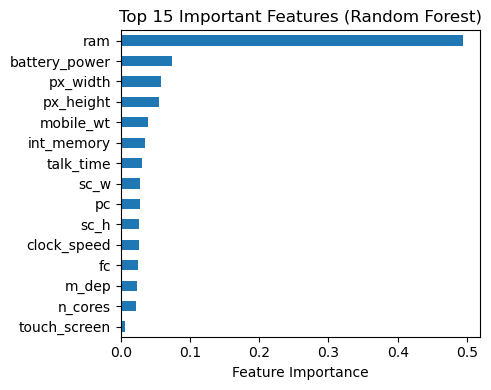

In [9]:
# Step 5: Plot the Top 15 Features
plt.figure(figsize=(5,4))
feature_importance_sorted.head(15).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Selcting the top features which are important for prediction

## Model Building

In [10]:
importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns)
top_15_features = feature_importance.sort_values(ascending=False).head(15).index

In [11]:
#Drop unimportant features
X_top15 = X[top_15_features]


In [12]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_top15, y, test_size=0.2, random_state=42)

In [13]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression Results:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R^2 Score: {lr_r2}")


Linear Regression Results:
Mean Squared Error: 0.10499198702234214
R^2 Score: 0.9213097404261087


In [14]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)
print("XGBoost Results:")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R^2 Score: {xgb_r2}")


XGBoost Results:
Mean Squared Error: 0.07998697039584038
R^2 Score: 0.9400507211685181


In [15]:
#  Train Random Forest with top 15 features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
#Predict and evaluate
y_pred = model.predict(X_test)


In [17]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.89

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.88      0.88        91
           2       0.82      0.82      0.82        92
           3       0.91      0.89      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



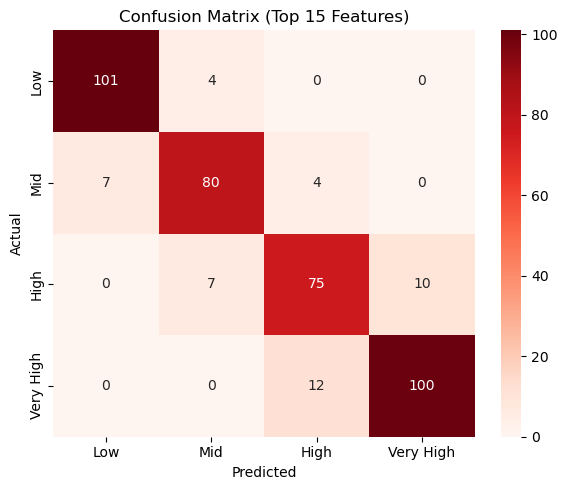

In [18]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Low', 'Mid', 'High', 'Very High'],
            yticklabels=['Low', 'Mid', 'High', 'Very High'])
plt.title('Confusion Matrix (Top 15 Features)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [19]:
print(model.feature_names_in_)


['ram' 'battery_power' 'px_width' 'px_height' 'mobile_wt' 'int_memory'
 'talk_time' 'sc_w' 'pc' 'sc_h' 'clock_speed' 'fc' 'm_dep' 'n_cores'
 'touch_screen']


#### After Evaluating the Multiple Models XGBoost has been performed well compare to all others so we have pickled that model for future use


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


preprocessing_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", xgb_model)
])

# Fit the pipeline
preprocessing_pipeline.fit(X_train, y_train)

# Save the pipeline
with open("xgboost_pipeline.pkl", "wb") as file:
    pickle.dump(preprocessing_pipeline, file)


#### The below script can be used to predict the cell price range by getting the inputs from users

In [ ]:
import pickle
import pandas as pd

# Feature names in the order they were used during training
feature_order = [
    'ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 
    'int_memory', 'talk_time', 'sc_w', 'pc', 'sc_h', 
    'clock_speed', 'fc', 'm_dep', 'n_cores', 'touch_screen'
]

# Accept user inputs in the order of features
inputs = []
inputs.append(int(input("Enter RAM (MB): ")))  # ram
inputs.append(int(input("Enter Battery Power (mAh): ")))  # battery_power
inputs.append(int(input("Enter Pixel Resolution Width: ")))  # px_width
inputs.append(int(input("Enter Pixel Resolution Height: ")))  # px_height
inputs.append(int(input("Enter Mobile Weight (grams): ")))  # mobile_wt
inputs.append(int(input("Enter Internal Memory (GB): ")))  # int_memory
inputs.append(int(input("Enter Talk Time (hours): ")))  # talk_time
inputs.append(int(input("Enter Screen Width (cm): ")))  # sc_w
inputs.append(int(input("Enter Primary Camera (MP): ")))  # pc
inputs.append(int(input("Enter Screen Height (cm): ")))  # sc_h
inputs.append(float(input("Enter Clock Speed (GHz): ")))  # clock_speed
inputs.append(int(input("Enter Front Camera (MP): ")))  # fc
inputs.append(float(input("Enter Mobile Depth (cm): ")))  # m_dep
inputs.append(int(input("Enter Number of Cores: ")))  # n_cores
inputs.append(int(input("Touch Screen (1 for Yes, 0 for No): ")))  # touch_screen

# Create a DataFrame with the correct feature order
feature_df = pd.DataFrame([inputs], columns=feature_order)

# Load the model
with open("xgboost_pipeline.pkl", "rb") as file:
    model = pickle.load(file)

# Predict
prediction = model.predict(feature_df)
print(f"Predicted Price Range: {prediction[0]}")


##### In the above script the outputs  are 0: low cost, 1: medium cost , 2: high cost , 3: very high cost